<a href="https://colab.research.google.com/github/mosahle7/ML/blob/main/Handwritten%20Digit%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dataset**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, y = fetch_openml("mnist_784", version=1,return_X_y=True,parser="auto")

In [22]:
# X_train, X_test = X[:60000], X[60000:]
# y_train, y_test = y[:60000], y[60000:]
# print("Training set size: ",len(X_train))
# print("Test set size: ",len(X_test))

In [23]:
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size = 0.86)

In [24]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
69771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# X_train.value_counts(return_counts = True)
y_train.value_counts()

,count
class,
1,6766
7,6257
3,6161
2,6016
9,5984
0,5945
6,5918
4,5862
8,5846


In [26]:
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = np.array(y_train,dtype="int8")
y_test = np.array(y_test,dtype="int8")


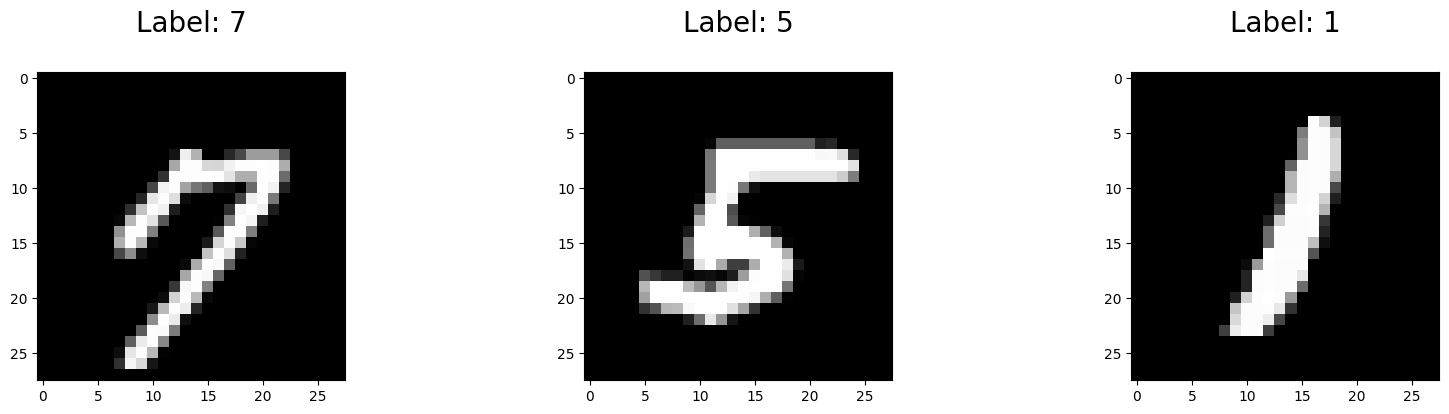

In [27]:
plt.figure(figsize=(20,4))
for ind, (img,label) in enumerate(zip(X_train[0:3], y_train[:3])):
  plt.subplot(1,3,ind+1)
  plt.imshow(np.reshape(img,(28,28)),cmap=plt.cm.gray)
  plt.title("Label: %s\n" % label,fontsize=20)

**MLP**

In [28]:
from sklearn.neural_network import MLPClassifier

In [55]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=26,
    alpha=1e-2,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
    learning_rate='adaptive',
    early_stopping=True,
    validation_fraction=0.1

)

In [56]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.33717475
Validation score: 0.938372
Iteration 2, loss = 0.16625373
Validation score: 0.955316
Iteration 3, loss = 0.12520084
Validation score: 0.961794
Iteration 4, loss = 0.10594134
Validation score: 0.963455
Iteration 5, loss = 0.09135143
Validation score: 0.965781
Iteration 6, loss = 0.08196280
Validation score: 0.966611
Iteration 7, loss = 0.07329729
Validation score: 0.966611
Iteration 8, loss = 0.06708573
Validation score: 0.968605
Iteration 9, loss = 0.06222360
Validation score: 0.969103
Iteration 10, loss = 0.05734315
Validation score: 0.969601
Iteration 11, loss = 0.05505567
Validation score: 0.970930
Iteration 12, loss = 0.05215847
Validation score: 0.969103
Iteration 13, loss = 0.04936905
Validation score: 0.969435
Iteration 14, loss = 0.04663687
Validation score: 0.969601
Iteration 15, loss = 0.04359088
Validation score: 0.965449
Iteration 16, loss = 0.04295252
Validation score: 0.970930
Iteration 17, loss = 0.04114189
Validation score: 0.969269
Iterat

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (26) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=(50,),
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=26,
              random_state=1, solver='sgd', verbose=10)

**Evaluate on a hold-out dataset**

In [57]:
print("Train Accuracy: ",mlp.score(X_train,y_train))
print("Test Accuracy: ",mlp.score(X_test,y_test))

Train Accuracy:  0.996312292358804
Test Accuracy:  0.9716326530612245


In [40]:
preds = mlp.predict(X_test)

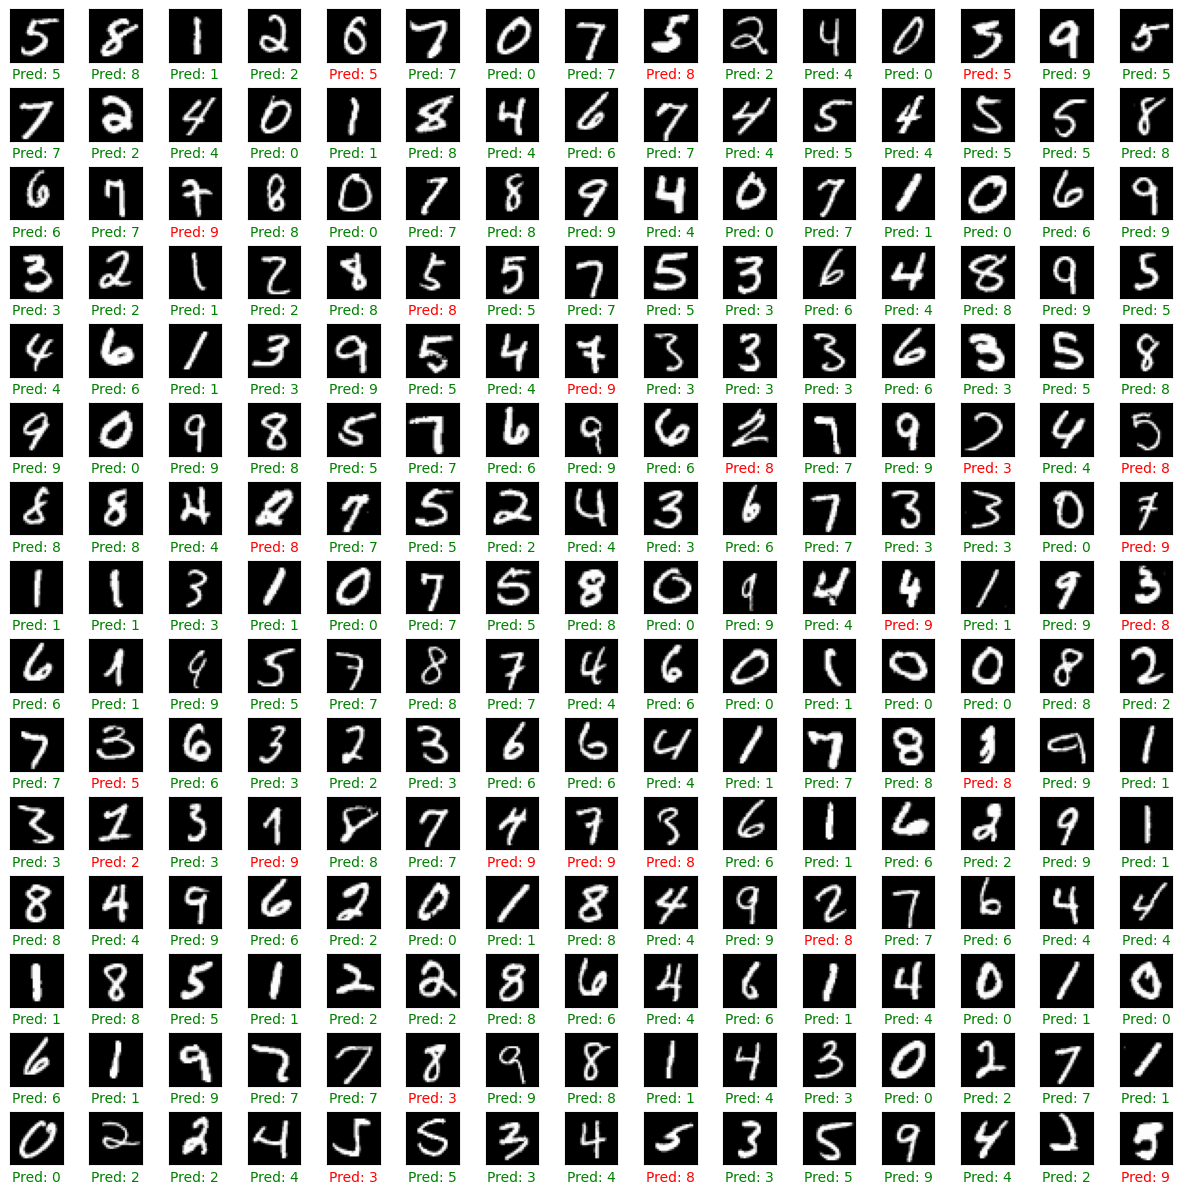

In [58]:
plt.figure(figsize=(15,15))

for ind, (img,pred,label) in enumerate(zip(X_test[:225],preds[:225],y_test[:225])):
  plt.subplot(15,15,ind+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(np.reshape(img,(28,28)), cmap=plt.cm.gray)
  fontcolor = "g" if pred==label else "r"
  # plt.title("Prediction: %i\n Label: %i\n" % (pred,label),fontsize=10,color=fontcolor)
  plt.xlabel(f"Pred: {pred}",color = fontcolor)

plt.subplots_adjust(hspace=0.5,wspace=0.5)